# Coefficients

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams
import seaborn as sns; sns.set()
import tadasets

### Torus


In [3]:
cos = np.cos
sin = np.sin
sqrt = np.sqrt
pi = np.pi

def torus(theta,phi, c, a):
    x = (c + a*cos(theta)) * cos(phi)
    y = (c + a*cos(theta)) * sin(phi)
    z = a * np.sin(theta)
    return x,y,z

In [4]:
n = 18
m = 35
theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, m)
theta, phi = np.meshgrid(theta, phi)
x, y, z = torus(theta, phi, 2, 1)
torus = np.column_stack((np.concatenate(x), np.concatenate(y), np.concatenate(z)))

In [5]:
len(torus)

630

Text(0.5, 0.92, 'Torus')

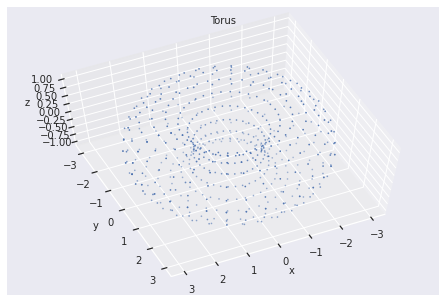

In [6]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z, s=0.5)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
plt.tick_params(labelsize=10)
ax.view_init(65, 65)
ax.set_title('Torus', fontsize=10)

 Compute persistent homology with coefficients in $\mathbb{Z}_2$

CPU times: user 1min 50s, sys: 1.03 s, total: 1min 51s
Wall time: 1min 50s


Text(0.5, 1.0, '$\\mathbb{Z} / 2$')

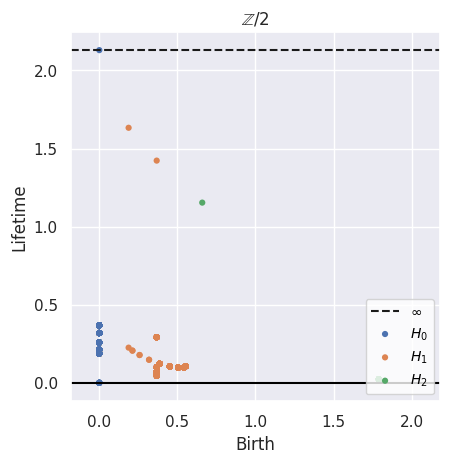

In [19]:
%%time
dgms = ripser(torus, coeff=2, maxdim= 2)['dgms']
sns.set()
plot_diagrams(dgms, lifetime = True)
plt.title("$\mathbb{Z} / 2$")

Persistent homology with coefficients in $\mathbb{Z}_3$ does not change

CPU times: user 1min 53s, sys: 1.32 s, total: 1min 54s
Wall time: 1min 53s


Text(0.5, 1.0, '$\\mathbb{Z} / 3$')

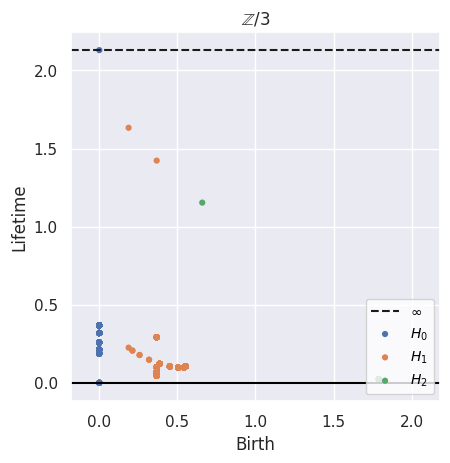

In [7]:
%%time
dgms = ripser(torus, coeff=3, maxdim= 2)['dgms']
sns.set()
plot_diagrams(dgms, lifetime = True)
plt.title("$\mathbb{Z} / 3$")

### Klein Bottle

In [7]:
cos = np.cos
sin = np.sin
sqrt = np.sqrt
pi = np.pi

Do Carmo's Riemannian Geometry, and struggling to solve a problem.

The mapping $F:\mathbb{R}^2\to\mathbb{R}^4$ given by

$$F(x,y)=((r\cos y+a)\cos x,(r\cos y+a)\sin x,r\sin y\cos x/2,r\sin y\sin x/2))$$

induces an embedding of the Klein bottle into $\mathbb{R}^4$.

In [8]:
n = 18
m = 35

In [9]:
theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, m)
theta, phi = np.meshgrid(theta, phi)

In [10]:
def klein(theta, phi, r, a):
    x = (r*cos(theta) + a) * cos(phi)
    y = (r*cos(theta) + a) * sin(phi)
    z = r*sin(theta) * cos(phi/2)
    w = r*sin(theta) * sin(phi/2)
    return x,y,z,w

In [11]:
x, y, z, w = klein(theta, phi, 2, 1)

In [12]:
klein = np.column_stack((np.concatenate(x), np.concatenate(y), np.concatenate(z), np.concatenate(w)))

In [13]:
len(klein)

630

CPU times: user 1min 11s, sys: 1.05 s, total: 1min 12s
Wall time: 1min 12s


Text(0.5, 1.0, '$\\mathbb{Z} / 2$')

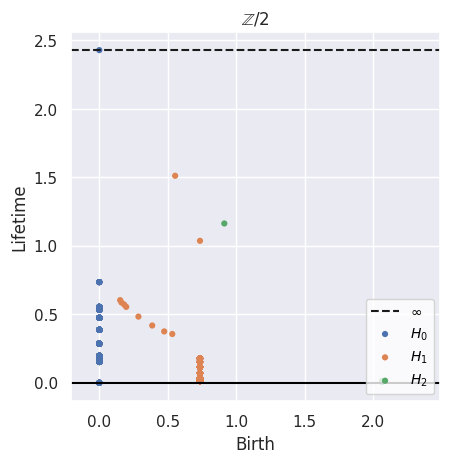

In [17]:
%%time
sns.set()
dgms2 = ripser(klein, coeff=2, maxdim= 2)['dgms']
plot_diagrams(dgms2, lifetime = True)
plt.title("$\mathbb{Z} / 2$")

CPU times: user 1min 10s, sys: 908 ms, total: 1min 11s
Wall time: 1min 10s


Text(0.5, 1.0, '$\\mathbb{Z} / 3$')

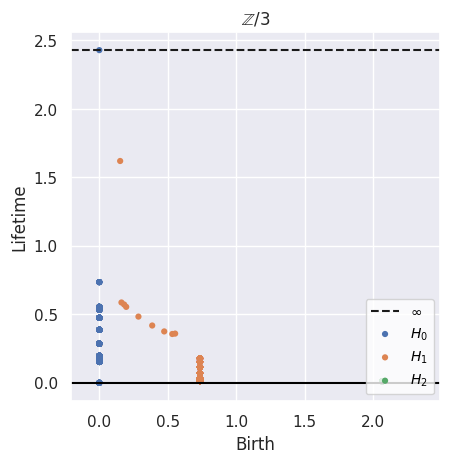

In [18]:
%%time
sns.set()
dgms3 = ripser(klein, coeff=3, maxdim= 2)['dgms']
plot_diagrams(dgms3, lifetime = True)
plt.title("$\mathbb{Z} / 3$")